#  Backtest e simulação de carteira de ativos

**Finalidade**

- Extrair dados financeiros da API do Yahoo Finance;
- Carregar os dados de ativos financeiros de uma carteria com valores fictícios;
- Criar um DataFrame base para as análises;
- Normalização dos dados da tabela para fazer as comparações dos ativos;
- Visualizar os dados para obter informações e insights dos investimentos.

##1 Bibliotecas

In [2]:
# Importação das bibliotecas necessárias

import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 2 Configuração de carteira

In [3]:
# Configuração da carteira através de uma estrutura de dicionário, onde a chave é o ticker do ativo e o valor é a
# quantidade monetária investida

compras = {
    'VALE3.SA': 1400,
    'WEGE3.SA': 1300,
    'BPAC11.SA': 1100,
    'KNRI11.SA': 1000,
    'SMAL11.SA': 800,
    'AAPL34.SA': 700,
    'IVVB11.SA': 500,
    'PETR4.SA': 1000,
    'COCA34.SA': 1000
}

compras

{'VALE3.SA': 1400,
 'WEGE3.SA': 1300,
 'BPAC11.SA': 1100,
 'KNRI11.SA': 1000,
 'SMAL11.SA': 800,
 'AAPL34.SA': 700,
 'IVVB11.SA': 500,
 'PETR4.SA': 1000,
 'COCA34.SA': 1000}

**Para fins de simplificação**

* Apenas um aporte em cada ação
* Os aportes foram todos feitos no mesmo dia


In [4]:
# Extraindo os dados das chaves do dicionário acima e os transformando em uma lista

chaves_carteira = list(compras.keys())
chaves_carteira

['VALE3.SA',
 'WEGE3.SA',
 'BPAC11.SA',
 'KNRI11.SA',
 'SMAL11.SA',
 'AAPL34.SA',
 'IVVB11.SA',
 'PETR4.SA',
 'COCA34.SA']

In [5]:
# Extraindo os dados dos valores do dicionário e os tranformando em uma lista

valores_carteira = list(compras.values())
valores_carteira

[1400, 1300, 1100, 1000, 800, 700, 500, 1000, 1000]

In [6]:
# Verificando o valor total aportado na carteira

sum(valores_carteira)

8800

## 3 Extração dos dados

In [7]:
# Definindo uma data início e uma data fim para filtrar o carregamento dos dados

data_inicio = '2020-01-01'
data_fim = '2023-07-01'

In [8]:
# Utilizando o método .download() da biblioteca Yahofinance para extrair dados financeiros da carteira de ativos

yf.download(chaves_carteira, # Nomes dos ativos (tickers)
            start = data_inicio, # Data início dos registros
            end = data_fim, # Data fim dos registros
            progress=False)['Adj Close'] # Selecionando um filtro apenas dos dados contidos na coluna 'Adj Close'

Ticker,AAPL34.SA,BPAC11.SA,COCA34.SA,IVVB11.SA,KNRI11.SA,PETR4.SA,SMAL11.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,
2020-01-02,14.754492,17.313044,33.390060,140.600006,168.966888,11.240598,139.500000,36.413353,16.543850
2020-01-03,14.783674,17.363285,32.934860,140.699997,168.966888,11.149061,140.899994,36.145267,16.332598
2020-01-06,14.856631,17.338161,33.031544,141.199997,167.595535,11.280871,139.100006,35.930790,16.374846
2020-01-07,14.893110,17.407335,33.031544,141.300003,168.247360,11.236936,139.399994,36.192181,16.501596
2020-01-08,15.018353,17.253069,33.015186,141.550003,158.723907,11.167367,138.199997,36.198879,15.877215
...,...,...,...,...,...,...,...,...,...
2023-06-26,43.899529,29.407410,47.530552,228.000000,146.306671,26.651030,108.250000,60.758018,35.777836
2023-06-27,45.014942,29.221720,47.921993,232.020004,146.782028,26.443628,106.300003,61.484833,35.876122
2023-06-28,45.612484,29.319450,47.745846,234.740005,148.198792,26.694239,106.349998,59.543594,35.954762


In [9]:
# Atribuindo o resultado acima à variável dataset

dataset = yf.download(chaves_carteira,
            start = data_inicio,
            end = data_fim,
            progress=False)['Adj Close']

In [10]:
# Utilizando o método .download() da biblioteca Yahofinance para extrair dados financeiros do índice Ibovespa

yf.download('^BVSP',
            start=data_inicio,
            end=data_fim,
            progress=False)['Adj Close'].to_frame()

,Adj Close
Date,
2020-01-02,118573.0
2020-01-03,117707.0
2020-01-06,116878.0
2020-01-07,116662.0
2020-01-08,116247.0
...,...
2023-06-26,118243.0
2023-06-27,117523.0
2023-06-28,116681.0


In [11]:
# Atribuindo o resultado acima à variável ibov

ibov = yf.download('^BVSP',
            start=data_inicio,
            end=data_fim,
            progress=False)['Adj Close'].to_frame()

In [12]:
# Renomeando a coluna 'Adj Close' do DataFrame

ibov.rename(columns={'Adj Close': 'IBOV'}, inplace=True)

In [13]:
ibov.head()

,IBOV
Date,
2020-01-02,118573.0
2020-01-03,117707.0
2020-01-06,116878.0
2020-01-07,116662.0
2020-01-08,116247.0


In [14]:
# Filtrando apenas a primeira linha da tabela para pegarmos os valores de mercado dos ativos na data da compra dos mesmos

valores_de_compra = dataset.iloc[0]
valores_de_compra

Ticker
AAPL34.SA     14.754492
BPAC11.SA     17.313044
COCA34.SA     33.390060
IVVB11.SA    140.600006
KNRI11.SA    168.966888
PETR4.SA      11.240598
SMAL11.SA    139.500000
VALE3.SA      36.413353
WEGE3.SA      16.543850
Name: 2020-01-02 00:00:00, dtype: float64

In [15]:
# Criando um objeto Series com os nomes dos ativos e os valores aportados em cada ativo.
# A finalidade é dividir o total de valor disponível para investimento pelo valor do ativo no dia.
# Assim conseguimos a quantidade exata de cada lote comprado


valores_aporte = pd.Series(data = valores_carteira, index = chaves_carteira)
valores_aporte

VALE3.SA     1400
WEGE3.SA     1300
BPAC11.SA    1100
KNRI11.SA    1000
SMAL11.SA     800
AAPL34.SA     700
IVVB11.SA     500
PETR4.SA     1000
COCA34.SA    1000
dtype: int64

In [16]:
# Como mencionado acima, dividimos os valores do aporte pelo valor de compra de cada ativo e teremos a quantidade de lote de cada papel

quantidade_compra_ativos = round(valores_aporte / valores_de_compra, 0)
quantidade_compra_ativos

AAPL34.SA    47.0
BPAC11.SA    64.0
COCA34.SA    30.0
IVVB11.SA     4.0
KNRI11.SA     6.0
PETR4.SA     89.0
SMAL11.SA     6.0
VALE3.SA     38.0
WEGE3.SA     79.0
dtype: float64

In [17]:
# Com o quantidade de unidade de cada ativo vezes seu próprio preço temos o valor exato da nossa cateira desde o primeiro dia do aporte
# até o final da série definida na variável data_fim

patrimonio = dataset * quantidade_compra_ativos
patrimonio

Ticker,AAPL34.SA,BPAC11.SA,COCA34.SA,IVVB11.SA,KNRI11.SA,PETR4.SA,SMAL11.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,
2020-01-02,693.461115,1108.034790,1001.701813,562.400024,1013.801331,1000.413198,837.000000,1383.707413,1306.964146
2020-01-03,694.832689,1111.250244,988.045807,562.799988,1013.801331,992.266447,845.399963,1373.520164,1290.275221
2020-01-06,698.261670,1109.642334,990.946312,564.799988,1005.573212,1003.997554,834.600037,1365.370018,1293.612795
2020-01-07,699.976183,1114.069458,990.946312,565.200012,1009.484161,1000.087270,836.399963,1375.302864,1303.626120
2020-01-08,705.862613,1104.196411,990.455589,566.200012,952.343445,993.895661,829.199982,1375.557411,1254.300015
...,...,...,...,...,...,...,...,...,...
2023-06-26,2063.277840,1882.074219,1425.916557,912.000000,877.840027,2371.941633,649.500000,2308.804703,2826.449032
2023-06-27,2115.702282,1870.190063,1437.659798,928.080017,880.692169,2353.482920,637.800018,2336.423645,2834.213600
2023-06-28,2143.786747,1876.444824,1432.375374,938.960022,889.192749,2375.787241,638.099991,2262.656586,2840.426159


In [18]:
# Para saber o valor total do patrimônio no dia, vamos criar uma coluna 'PL_total' que contém a soma
# de todos os ativos

patrimonio['PL_total'] = patrimonio.sum(axis=1) # axis = 1 ou axis = 'columns' para calcular a soma na horizontal
patrimonio.head()

Ticker,AAPL34.SA,BPAC11.SA,COCA34.SA,IVVB11.SA,KNRI11.SA,PETR4.SA,SMAL11.SA,VALE3.SA,WEGE3.SA,PL_total
Date,,,,,,,,,,
2020-01-02,693.461115,1108.034790,1001.701813,562.400024,1013.801331,1000.413198,837.000000,1383.707413,1306.964146,8907.483829
2020-01-03,694.832689,1111.250244,988.045807,562.799988,1013.801331,992.266447,845.399963,1373.520164,1290.275221,8872.191854
2020-01-06,698.261670,1109.642334,990.946312,564.799988,1005.573212,1003.997554,834.600037,1365.370018,1293.612795,8866.803919
2020-01-07,699.976183,1114.069458,990.946312,565.200012,1009.484161,1000.087270,836.399963,1375.302864,1303.626120,8895.092343
2020-01-08,705.862613,1104.196411,990.455589,566.200012,952.343445,993.895661,829.199982,1375.557411,1254.300015,8772.011140


In [19]:
# Visualização dos últimos cinco registros da tabela patrimonio

patrimonio.tail()

Ticker,AAPL34.SA,BPAC11.SA,COCA34.SA,IVVB11.SA,KNRI11.SA,PETR4.SA,SMAL11.SA,VALE3.SA,WEGE3.SA,PL_total
Date,,,,,,,,,,
2023-06-26,2063.277840,1882.074219,1425.916557,912.000000,877.840027,2371.941633,649.500000,2308.804703,2826.449032,15317.804010
2023-06-27,2115.702282,1870.190063,1437.659798,928.080017,880.692169,2353.482920,637.800018,2336.423645,2834.213600,15394.244513
2023-06-28,2143.786747,1876.444824,1432.375374,938.960022,889.192749,2375.787241,638.099991,2262.656586,2840.426159,15397.729692
2023-06-29,2154.552441,1935.865723,1426.797295,940.000000,899.259064,2386.554909,652.800018,2290.275528,2860.614941,15546.719917
2023-06-30,2168.126724,1967.139648,1415.054169,941.000000,893.498840,2271.188034,657.000000,2245.176041,2931.275978,15489.459435


In [20]:
# Para realizarmos a comparação da carteira de ativos com o índice Ibovespa, vamos utilizar o método .merge()
# que faz a união de duas tabelas através de um campo em comum, no caso o campo 'Date'

consolidado = pd.merge(
    patrimonio, #tabela1
    ibov, #tabela2
    how = 'inner', #método de união (unir somente onde há datas em comum nas duas tabelas)
    on = 'Date' # campo de combinação
)

consolidado.head()

,AAPL34.SA,BPAC11.SA,COCA34.SA,IVVB11.SA,KNRI11.SA,PETR4.SA,SMAL11.SA,VALE3.SA,WEGE3.SA,PL_total,IBOV
Date,,,,,,,,,,,
2020-01-02,693.461115,1108.034790,1001.701813,562.400024,1013.801331,1000.413198,837.000000,1383.707413,1306.964146,8907.483829,118573.0
2020-01-03,694.832689,1111.250244,988.045807,562.799988,1013.801331,992.266447,845.399963,1373.520164,1290.275221,8872.191854,117707.0
2020-01-06,698.261670,1109.642334,990.946312,564.799988,1005.573212,1003.997554,834.600037,1365.370018,1293.612795,8866.803919,116878.0
2020-01-07,699.976183,1114.069458,990.946312,565.200012,1009.484161,1000.087270,836.399963,1375.302864,1303.626120,8895.092343,116662.0
2020-01-08,705.862613,1104.196411,990.455589,566.200012,952.343445,993.895661,829.199982,1375.557411,1254.300015,8772.011140,116247.0


In [21]:
# Os valores dos dados dos ativos e do índice Ibovespa não estão na mesma 'proporção', pois um está em reais e o outro em pontos
# Por isso vamos ajustar a escala dos dados (normalização) dividindo todas os valores de cada linha pela primeira linha da tabela,
# trazendo uma padronização inicial valendo-se da premissa que todos começaram com uma (1) unidade

consolidado_normalizado = consolidado / consolidado.iloc[0]
consolidado_normalizado

,AAPL34.SA,BPAC11.SA,COCA34.SA,IVVB11.SA,KNRI11.SA,PETR4.SA,SMAL11.SA,VALE3.SA,WEGE3.SA,PL_total,IBOV
Date,,,,,,,,,,,
2020-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2020-01-03,1.001978,1.002902,0.986367,1.000711,1.000000,0.991857,1.010036,0.992638,0.987231,0.996038,0.992696
2020-01-06,1.006923,1.001451,0.989263,1.004267,0.991884,1.003583,0.997133,0.986748,0.989784,0.995433,0.985705
2020-01-07,1.009395,1.005446,0.989263,1.004979,0.995742,0.999674,0.999283,0.993926,0.997446,0.998609,0.983883
2020-01-08,1.017883,0.996536,0.988773,1.006757,0.939379,0.993485,0.990681,0.994110,0.959705,0.984791,0.980383
...,...,...,...,...,...,...,...,...,...,...,...
2023-06-26,2.975333,1.698570,1.423494,1.621622,0.865890,2.370962,0.775986,1.668564,2.162606,1.719656,0.997217
2023-06-27,3.050931,1.687844,1.435217,1.650213,0.868703,2.352511,0.762007,1.688524,2.168547,1.728237,0.991145
2023-06-28,3.091430,1.693489,1.429942,1.669559,0.877088,2.374806,0.762366,1.635213,2.173301,1.728628,0.984044


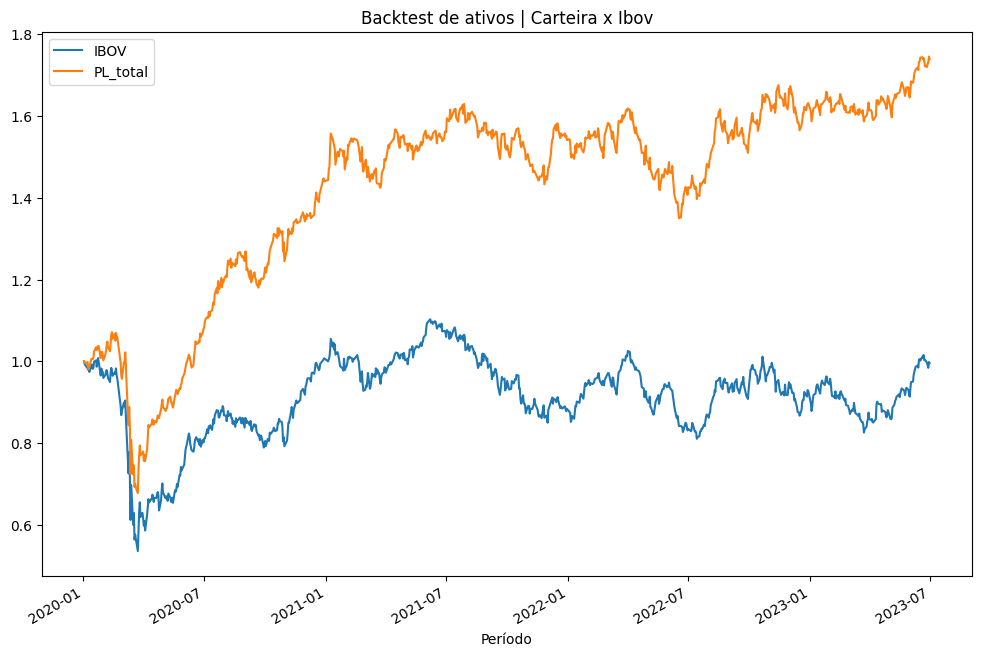

In [22]:
# Criando um gráfico de linhas com a série temporal da avolução do patrimônio líquido da carteira e do Ibovespa

consolidado_normalizado[['IBOV', 'PL_total']].plot( # Filtrando dados das colunas 'IBOV' e 'PL_total'
    figsize = (12, 8), # tamanho da figura
    title = 'Backtest de ativos | Carteira x Ibov', # Título do gráfico
    xlabel='Período' # Rótulo do eixo x (horizontal)
);

Como podemos notar no gráfico acima, a carteira fictícia performou bem melhor que o Ibovespa desde o ano de 2020 até meados de 2023.

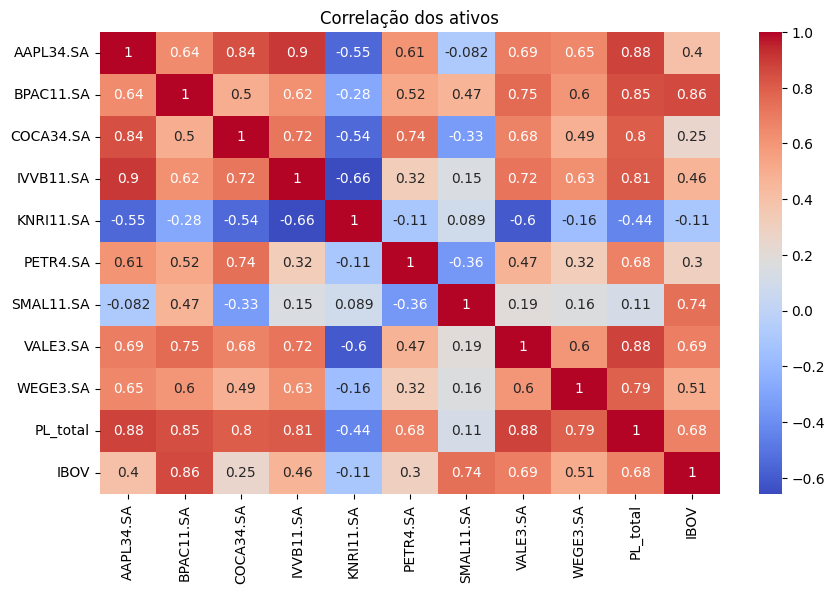

In [25]:
# Por questões de curiosidade, abaixo foi criado um gráfico de correlação entre os ativos da carteira, o patrimônio líquido e o Ibovespa

# Tamanho do gráfico
plt.figure(figsize = (10,6))

# Título do gráfico
plt.title('Correlação dos ativos')

# Gráfico de calor
sns.heatmap(consolidado_normalizado.corr(), # entrada de dados
            annot=True, # valor da correlação dentro de cada quadrado
            cmap='coolwarm' # Padrão das cores do gráfico
    );